In [26]:
#import libraries

# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
# Import model selection libraries
from sklearn.model_selection import train_test_split
# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB
# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [63]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [49]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Model is trained (fit) and predicted in the evaluate model


Train ROC AUC: 0.9849958733541326
Test ROC AUC: 0.9573217407027906


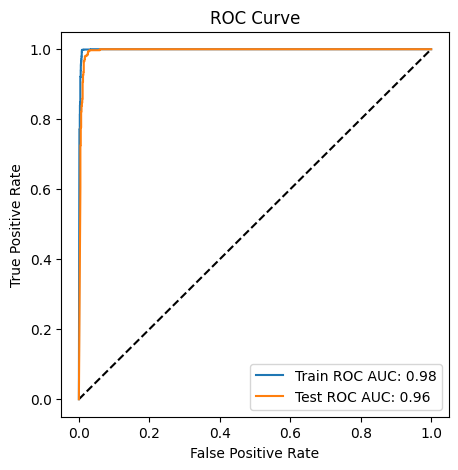


Confusion Matrix:


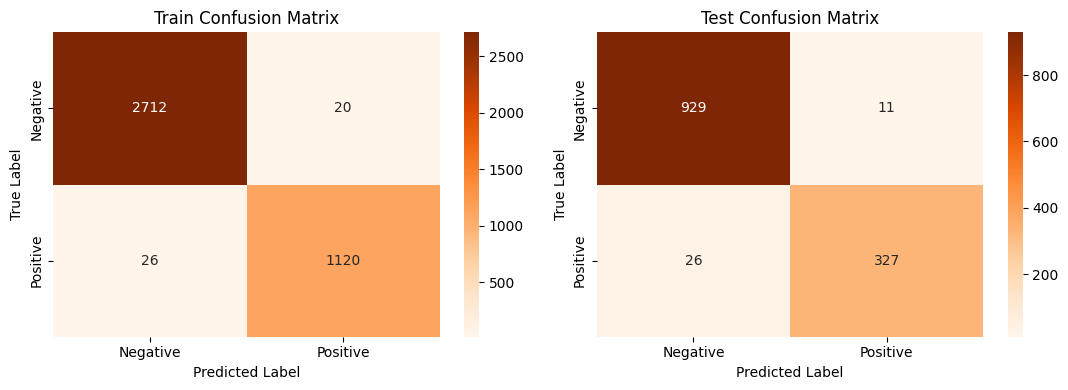


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.990504 | 0.992679 |   0.99159  | 2732        |
| 1            |    0.982456 | 0.977312 |   0.979878 | 1146        |
| accuracy     |    0.988138 | 0.988138 |   0.988138 |    0.988138 |
| macro avg    |    0.98648  | 0.984996 |   0.985734 | 3878        |
| weighted avg |    0.988126 | 0.988138 |   0.988129 | 3878        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.972775 | 0.988298 |   0.980475 |  940        |
| 1            |    0.967456 | 0.926346 |   0.946454 |  353        |
| accuracy     |    0.971384 | 0.971384 |   0.971384 |    0.971384 |
| macro avg    |    0.970115 | 0.957322 |   0.963465 | 1293        |
| weighted avg |    0.971323 | 0.971384 |   

In [52]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

In [51]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [73]:
def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text


In [92]:
def predict_spam(text):
    text = clean_text(text)
    prediction = clf.predict([text])  # still pass list
    return "spam" if prediction[0] == 1 else "ham"


# Test the prediction
predict_spam (""" 
      Suhani,

Thanks for your interest in the Front-End Developer Intern - JR-FED-Intern-2025-002 position at Appaxon Solutions in India. Unfortunately, we will not be moving forward with your application but we appreciate your time and interest in Appaxon Solutions.

Regards,
Appaxon Solutions  
  
 """)


'spam'

In [75]:
# Example of how to use the function
sample_email = 'money for copy Tickets for IPL'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


label
ham     3672
spam    1499
Name: count, dtype: int64


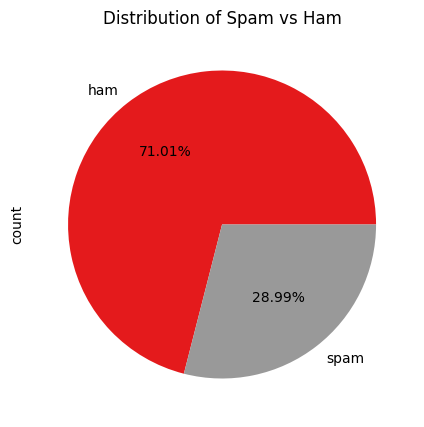

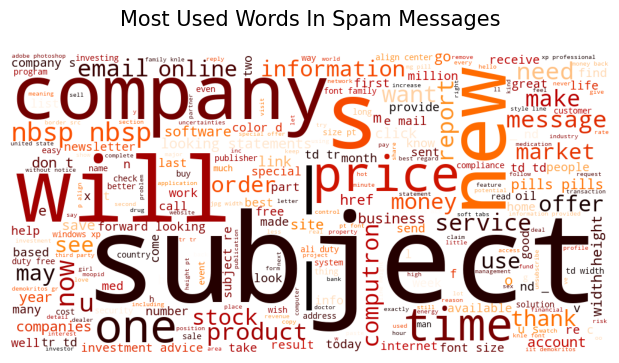

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       918
           1       0.96      0.94      0.95       375

    accuracy                           0.97      1293
   macro avg       0.97      0.96      0.97      1293
weighted avg       0.97      0.97      0.97      1293



'ham'

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Load dataset
df = pd.read_csv("spam_ham_dataset.csv")

# 2. Double check labels
print(df['label'].value_counts())
# Should show both spam and ham counts

# 3. Use label_num directly (0 for ham, 1 for spam)
X = df['text']
y = df['label_num']


# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['label'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()


# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.text:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()



# 4. Split the data (with stratify to preserve ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# 5. Build pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),
    ('model', MultinomialNB())
])

# 6. Train
clf.fit(X_train, y_train)

# 7. Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

def predict_spam(text):
    prediction = clf.predict([text])
    return "spam" if prediction[0] == 1 else "ham"

# Test
predict_spam(""" 

    


""")
